# Notes

- Used Random Forrest for feature selection
- Developed various models and looked at the residuals for evaluation
- Best model turned out to be Random Forest Regressor, in general every model seemed to get close to 2.2 error margin

<b> Comments <b>
- Focused on solely using matplotlib and not seaborn, for example
- A few outliers here and there that could be treated, perhaps applying robust scaler would do

In [43]:
#!pip install ucimlrepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 


In [3]:
data = pd.concat([X,y], axis=1)

In [4]:
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
abalone.metadata

{'uci_id': 1,
 'name': 'Abalone',
 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone',
 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv',
 'abstract': 'Predict the age of abalone from physical measurements',
 'area': 'Biology',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Tabular'],
 'num_instances': 4177,
 'num_features': 8,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': [],
 'target_col': ['Rings'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1994,
 'last_updated': 'Mon Aug 28 2023',
 'dataset_doi': '10.24432/C55C7W',
 'creators': ['Warwick Nash',
  'Tracy Sellers',
  'Simon Talbot',
  'Andrew Cawthorn',
  'Wes Ford'],
 'intro_paper': None,
 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of r

In [6]:
abalone.variables

,name,role,type,demographic,description,units,missing_values
0,Sex,Feature,Categorical,None,"M, F, and I (infant)",None,no
1,Length,Feature,Continuous,None,Longest shell measurement,mm,no
2,Diameter,Feature,Continuous,None,perpendicular to length,mm,no
3,Height,Feature,Continuous,None,with meat in shell,mm,no
4,Whole_weight,Feature,Continuous,None,whole abalone,grams,no
5,Shucked_weight,Feature,Continuous,None,weight of meat,grams,no
6,Viscera_weight,Feature,Continuous,None,gut weight (after bleeding),grams,no
7,Shell_weight,Feature,Continuous,None,after being dried,grams,no
8,Rings,Target,Integer,None,+1.5 gives the age in years,None,no


# EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
data["Sex"].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [9]:
height_m = data[data["Sex"] == "M"]["Height"]
height_f = data[data["Sex"] == "F"]["Height"]
height_i = data[data["Sex"] == "I"]["Height"]

height_box = [height_m,height_f,height_i]

In [10]:
diameter_m = data[data["Sex"] == "M"]["Diameter"]
diameter_f = data[data["Sex"] == "F"]["Diameter"]
diameter_i = data[data["Sex"] == "I"]["Diameter"]

diameter_box = [diameter_m,diameter_f,diameter_i]

In [11]:
length_m = data[data["Sex"] == "M"]["Length"]
length_f = data[data["Sex"] == "F"]["Length"]
length_i = data[data["Sex"] == "I"]["Length"]

length_box = [length_m,length_f,length_i]

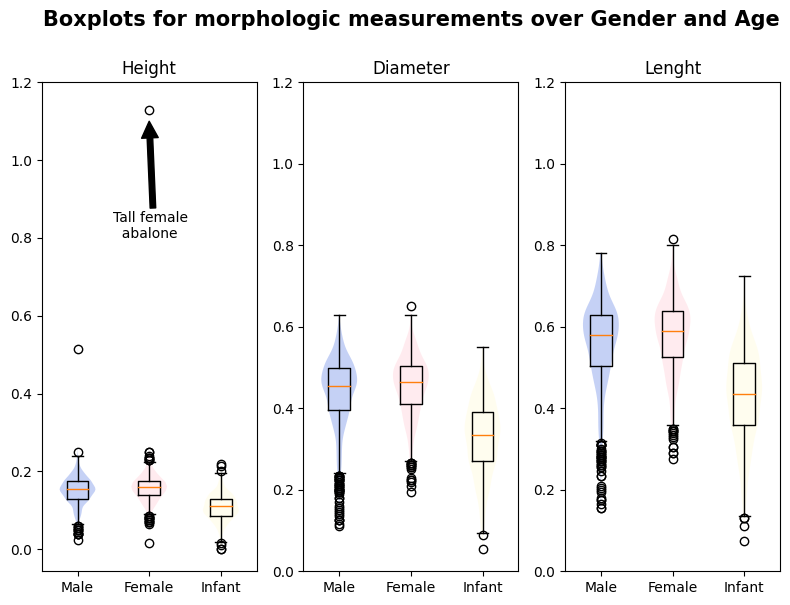

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(8,6))


ax1.boxplot(height_box ,labels=["Male", "Female", "Infant"])
vp1= ax1.violinplot(height_box, showextrema = False)

ax1.set_title("Height")


ax2.boxplot(diameter_box ,labels=["Male", "Female", "Infant"])
vp2 = ax2.violinplot(diameter_box, showextrema = False)
ax2.set_title("Diameter")


ax3.boxplot(length_box ,labels=["Male", "Female", "Infant"])
vp3 = ax3.violinplot(length_box, showextrema = False)
ax3.set_title("Lenght")

for pc1,pc2,pc3 in vp1['bodies'],vp2['bodies'],vp3['bodies']:
    pc1.set_facecolor('royalblue')
    pc2.set_facecolor('pink')
    pc3.set_facecolor('lemonchiffon')

    
ax1.annotate(text="Tall female \n  abalone",xy=(2, 1.1),xytext=(1.5, 0.8), 
             arrowprops=dict(facecolor='black', 
            shrinkA=0,shrinkB=0), fontsize=10)
plt.suptitle("Boxplots for morphologic measurements over Gender and Age", fontsize=15,fontweight="bold", x=0.52, y=1)


ax1.set_yticks((0,0.2,0.4,0.6,0.8,1,1.2))
ax2.set_yticks((0,0.2,0.4,0.6,0.8,1,1.2))
ax3.set_yticks((0,0.2,0.4,0.6,0.8,1,1.2))



plt.tight_layout()
plt.show()

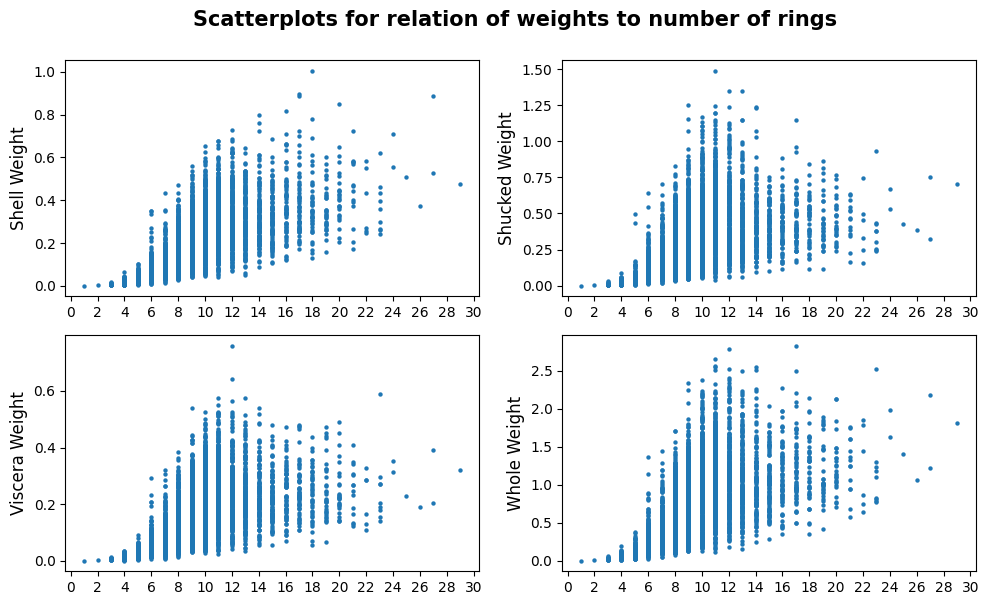

In [13]:
fig,[[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(10,6))

ax1.scatter(x=data["Rings"],y=data["Shell_weight"], linewidth=0,s=10)
ax2.scatter(x=data["Rings"],y=data["Shucked_weight"], linewidth=0,s=10)
ax3.scatter(x=data["Rings"],y=data["Viscera_weight"], linewidth=0,s=10)
ax4.scatter(x=data["Rings"],y=data["Whole_weight"], linewidth=0,s=10)

ax1.set_xticks((range(0,31,2)))
ax2.set_xticks((range(0,31,2)))
ax3.set_xticks((range(0,31,2)))
ax4.set_xticks((range(0,31,2)))



ax1.set_ylabel("Shell Weight", fontsize= 12)
ax2.set_ylabel("Shucked Weight", fontsize= 12)
ax3.set_ylabel("Viscera Weight", fontsize= 12)
ax4.set_ylabel("Whole Weight", fontsize= 12)



plt.suptitle("Scatterplots for relation of weights to number of rings", fontsize=15,fontweight="bold", x=0.52, y=1)

plt.tight_layout()
plt.show()

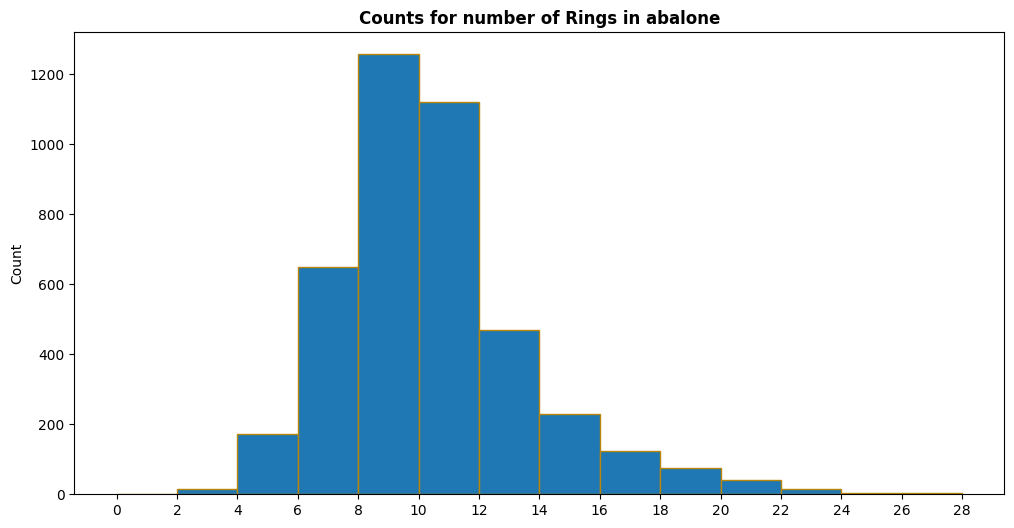

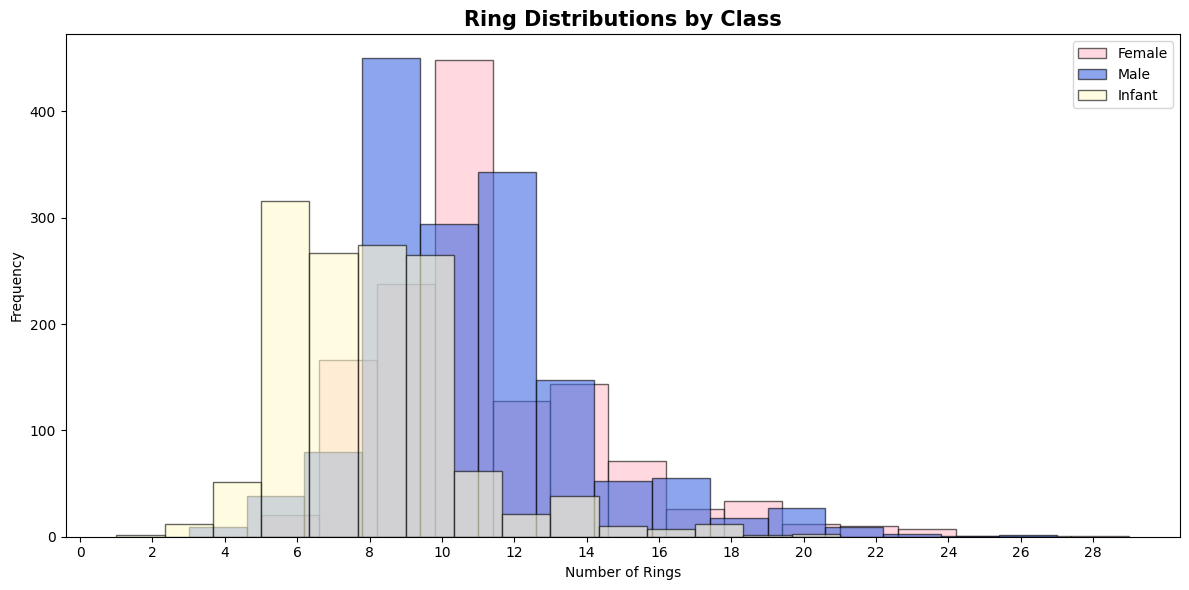

In [14]:
fig, ax1 = plt.subplots(1,1,figsize=(12,6))

ax1.hist(x=data["Rings"], bins = range(0,30,2),edgecolor='darkgoldenrod')
ax1.set_xticks(range(0,30,2))
ax1.set_title("Counts for number of Rings in abalone", fontweight="bold",fontsize=12)
ax1.set_ylabel("Count")
plt.show()


plt.figure(figsize=(12,6))
plt.hist(data[data["Sex"]=="F"]["Rings"], bins=15, alpha=0.6, label="Female", color='pink', edgecolor='black')
plt.hist(data[data["Sex"]=="M"]["Rings"], bins=15, alpha=0.6, label="Male", color='royalblue', edgecolor='black')
plt.hist(data[data["Sex"]=="I"]["Rings"], bins=15, alpha=0.6, label="Infant", color='lemonchiffon', edgecolor='black')
plt.xlabel("Number of Rings")
plt.ylabel("Frequency")
plt.title("Ring Distributions by Class", fontweight="bold", fontsize=15)
plt.xticks(range(0,30,2))
plt.legend()


plt.tight_layout()
plt.show()

In [15]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


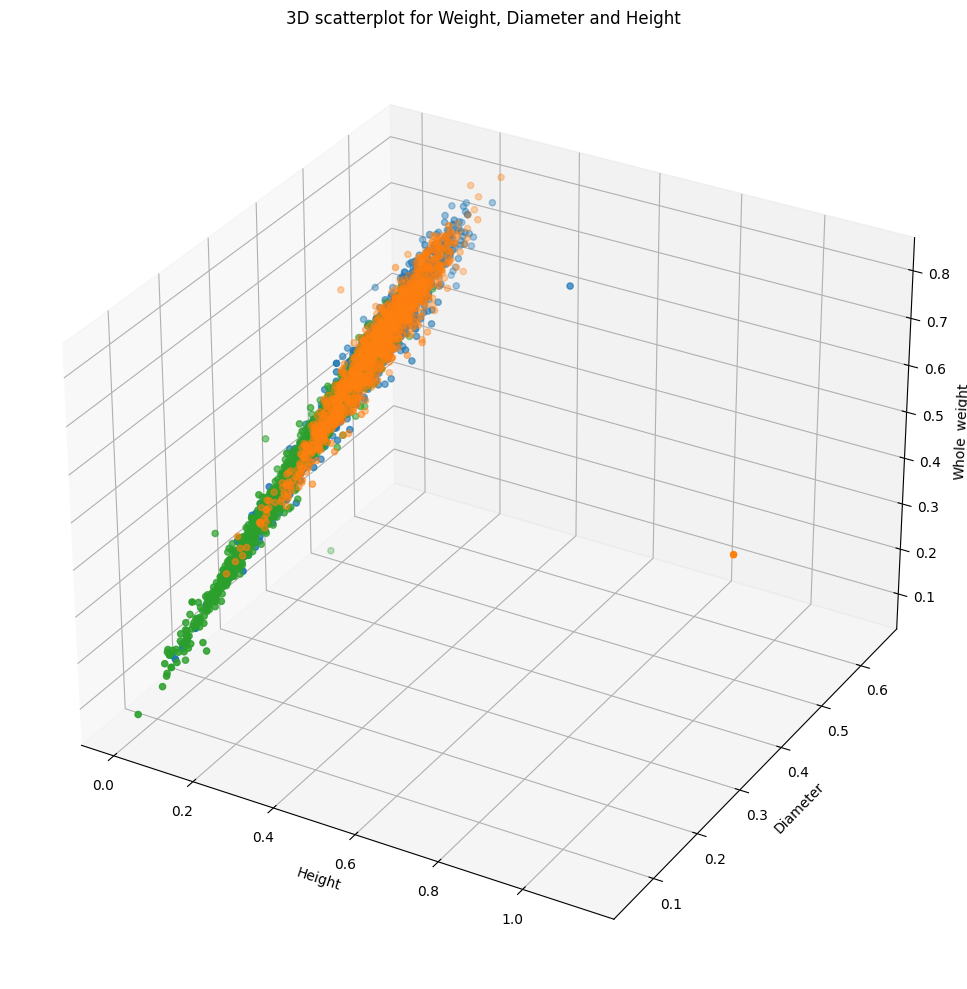

In [42]:
ax = plt.figure(figsize=(10,10),tight_layout=True).add_subplot(projection='3d')

ax.scatter(height_m,diameter_m,length_m)
ax.scatter(height_f,diameter_f,length_f)
ax.scatter(height_i,diameter_i,length_i)

ax.set_zlabel("Whole_weight")
ax.set_ylabel("Diameter")
ax.set_xlabel("Height")

ax.set_title("3D scatterplot for Weight, Diameter and Height")

plt.tight_layout()

plt.show()

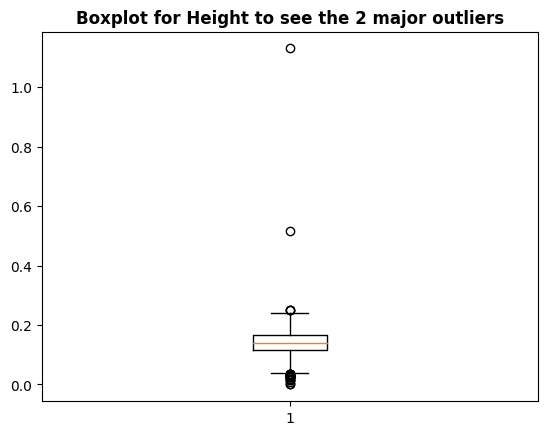

In [17]:
plt.boxplot(data["Height"])
plt.title("Boxplot for Height to see the 2 major outliers", fontweight="bold")
plt.show()

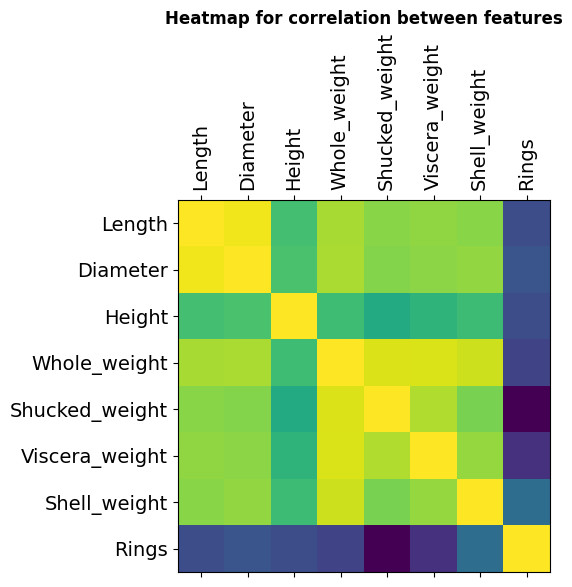

In [18]:
plt.matshow(data.corr(numeric_only=True))

plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)

plt.title("Heatmap for correlation between features", fontweight="bold")

plt.show()

In [19]:
data.select_dtypes("number").corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# Preprocessing

In [20]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [22]:
data = data[data["Height"] < 0.4] #dropping two outliers for height

In [23]:
X = data.drop(columns="Rings") #splitting input from output
y = data["Rings"]

In [24]:
X = pd.get_dummies(X, dtype="float")

In [25]:
X.drop(columns="Sex_M", inplace=True)

In [26]:
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.0,0.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0.0,0.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,1.0
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0.0,0.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0.0,0.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0,0.0


# Feature Selection

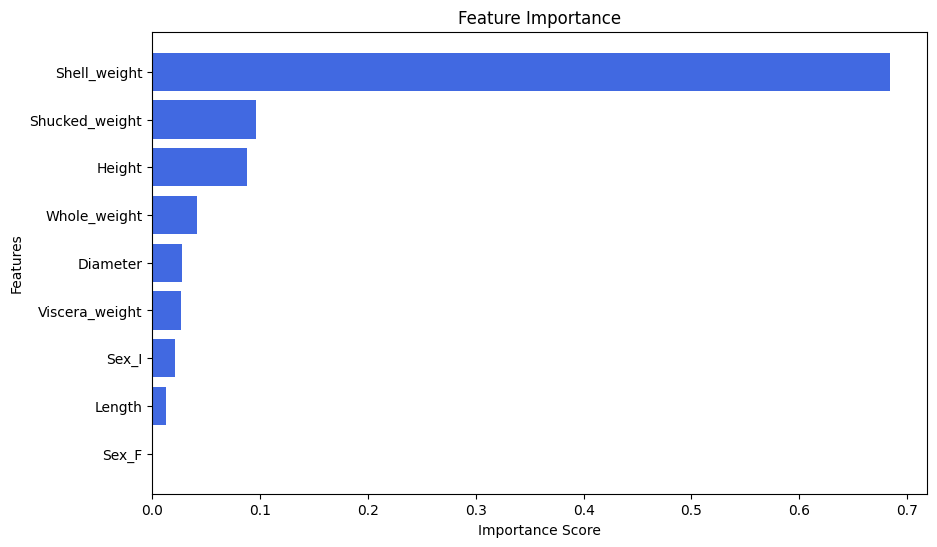

In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, criterion='squared_error', max_depth=4, 
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                              max_features=0.8, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                              bootstrap=True, oob_score=True, n_jobs=None, random_state=42, verbose=0, 
                              warm_start=False, ccp_alpha=0.0, max_samples=0.8, monotonic_cst=None)

model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)


feature_importances = feature_importances.sort_values(ascending=True)  # Ascending for horizontal bar

plt.figure(figsize=(10, 6))
plt.barh(y=feature_importances.index, width=feature_importances.values, color='royalblue') 
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [28]:
X= X[["Shell_weight","Height","Shucked_weight","Whole_weight","Diameter","Viscera_weight","Length","Sex_I","Sex_F"]]

# Modelling and Evaluation

Will use cumulative distribution of residuals and scatterplots to analyze the relationship between predicted and observed values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


scaler = MinMaxScaler().set_output(transform="pandas")

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [30]:
from sklearn.datasets import make_classification

model = RandomForestRegressor(n_estimators=200, criterion='squared_error', max_depth=8, 
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                              max_features=0.8, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                              bootstrap=True, oob_score=True, n_jobs=None, random_state=42, verbose=0, 
                              warm_start=False, ccp_alpha=0.0, max_samples=0.8, monotonic_cst=None)

In [31]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5).mean()

-2.179991247226323

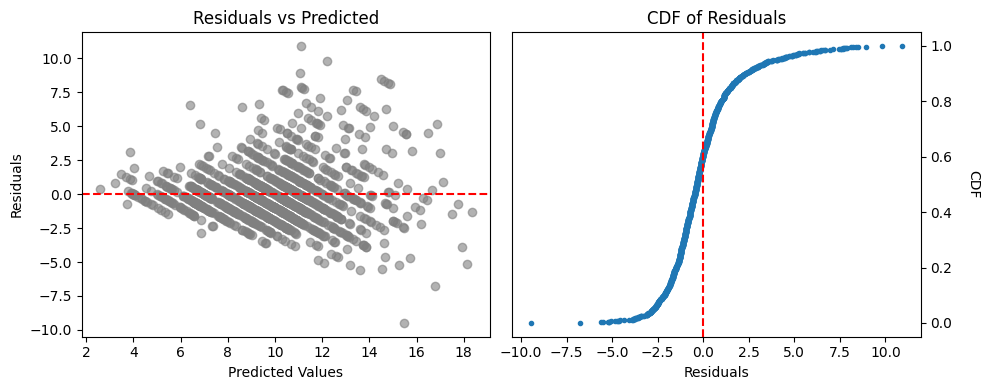

In [32]:
import pylab
import scipy.stats as stats


model.fit(X_train,y_train)
residuals = y_test - model.predict(X_test)
y_pred = model.predict(X_test)

sorted_residuals = np.sort(residuals)
cdf = np.arange(len(residuals)) / float(len(residuals))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4), tight_layout =True)

ax1.scatter(y_pred, residuals, alpha=0.6, color="grey")
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title("Residuals vs Predicted")
ax1.set_xlabel("Predicted Values")
ax1.set_ylabel("Residuals")


ax2.plot(sorted_residuals, cdf, marker='.', linestyle='none')
ax2.set_title("CDF of Residuals")
ax2.axvline(0, color='red', linestyle='--')
ax2.set_xlabel("Residuals")
ax2.set_ylabel("CDF", rotation=-90, labelpad=20)
ax2.yaxis.set_label_position("right")
ax2.yaxis.set_ticks_position("right")

plt.show()

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model1 = LinearRegression()

In [35]:
cross_val_score(model1, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5).mean()

-2.2272427468988325

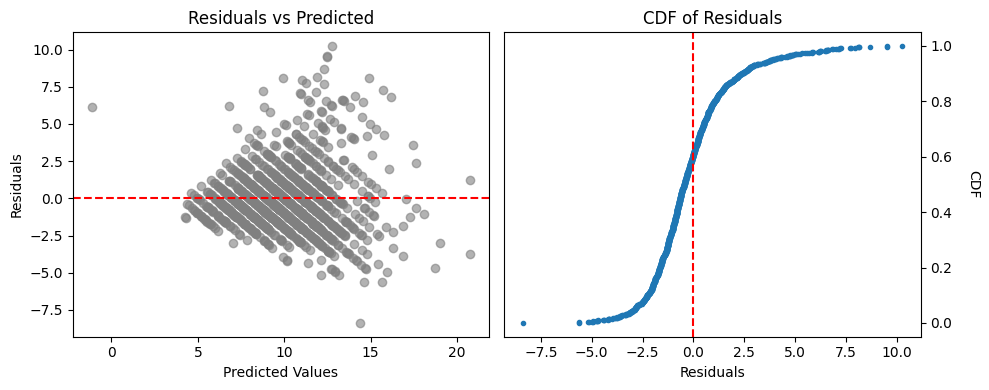

In [36]:
import pylab
import scipy.stats as stats


model1.fit(X_train,y_train)
residuals = y_test - model1.predict(X_test)
y_pred = model1.predict(X_test)

sorted_residuals = np.sort(residuals)
cdf = np.arange(len(residuals)) / float(len(residuals))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4), tight_layout =True)

ax1.scatter(y_pred, residuals, alpha=0.6, color="grey")
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title("Residuals vs Predicted")
ax1.set_xlabel("Predicted Values")
ax1.set_ylabel("Residuals")


ax2.plot(sorted_residuals, cdf, marker='.', linestyle='none')
ax2.set_title("CDF of Residuals")
ax2.axvline(0, color='red', linestyle='--')
ax2.set_xlabel("Residuals")
ax2.set_ylabel("CDF", rotation=-90, labelpad=20)
ax2.yaxis.set_label_position("right")
ax2.yaxis.set_ticks_position("right")

plt.show()

In [37]:
from sklearn.linear_model import BayesianRidge

model2 = BayesianRidge(tol = 0.0000000000001, verbose=True)

In [38]:
cross_val_score(model2, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5).mean()

Convergence after  16  iterations
Convergence after  18  iterations


-2.2272455469687875

Convergence after  15  iterations


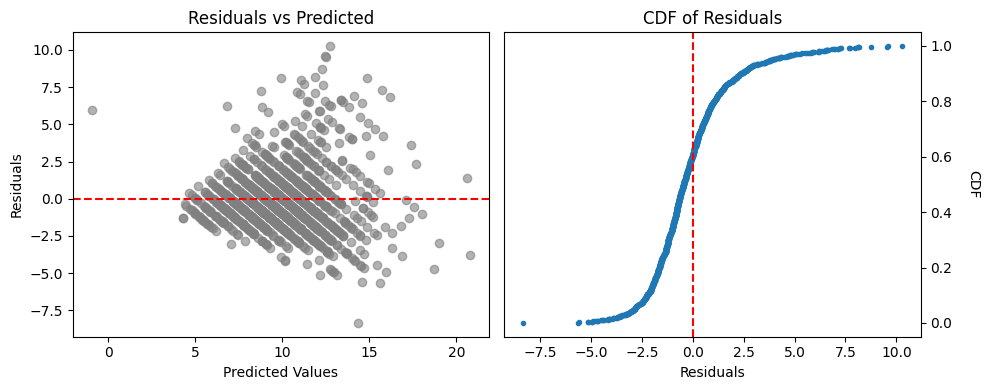

In [39]:
import pylab
import scipy.stats as stats


model2.fit(X_train,y_train)
residuals = y_test - model2.predict(X_test)
y_pred = model2.predict(X_test)

sorted_residuals = np.sort(residuals)
cdf = np.arange(len(residuals)) / float(len(residuals))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4), tight_layout =True)

ax1.scatter(y_pred, residuals, alpha=0.6, color="grey")
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title("Residuals vs Predicted")
ax1.set_xlabel("Predicted Values")
ax1.set_ylabel("Residuals")


ax2.plot(sorted_residuals, cdf, marker='.', linestyle='none')
ax2.set_title("CDF of Residuals")
ax2.axvline(0, color='red', linestyle='--')
ax2.set_xlabel("Residuals")
ax2.set_ylabel("CDF", rotation=-90, labelpad=20)
ax2.yaxis.set_label_position("right")
ax2.yaxis.set_ticks_position("right")

plt.show()

It seems that our model has difficulty with some outliers at its tail

# Concluding Notes

This notebook is finished as the end of day 1 is here, the main takeaways from today's notebook are some interesting 
visualizations using matplotlib.pyplot. Was also able to explore different regression models on the dataset and evaluate their
predictions